### Project 2 - Classification - Spring 2025

# Impact of Study Hours On Test Scores
<hr>

## Introduction
We all know that in order to be successful on an exam, you need to put time into to studying the material, but how much studying determines a pass or fail score? Throughout this project, I will be determining if I can predict if a student will pass or fail an upcoming exam passed on the number of hours a student studies and their previous exam score. 

Specific questions I want to answer:
- What is the average study hour amoungst all letter grades?
- Does someone automatically pass if they studied in the high category?
- **Does how much a student studies correlate to if they pass?**

My dataset: https://www.kaggle.com/datasets/mrsimple07/student-exam-performance-prediction
- This data set contains:
    - Number of study hours
    - Student's previous exam score
    - Passed or failed score


<hr>

## Pre-Processing 

In [52]:
#Importing the software that will be used 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [54]:
#Reading the csv file

exam_data = pd.read_csv("student_exam_data.csv")
exam_data

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0
...,...,...,...
495,4.180170,45.494924,0
496,6.252905,95.038815,1
497,1.699612,48.209118,0
498,9.769553,97.014241,1


**Below contains a large amount of tables, this is solely for organizational purposes. I'm going to explain and analyze each table in the Data Understanding & Visuals Section!**

- This dataset has over 500 rows making it overwhelming and hard to understand what this dataset is saying. I'm going to:
    1. Clean up the long decimals and make them whole numbers using the ".round( )" function (ex: 6.252905 = 6.0)
    2. Add another column indicating 'Very low - High' hour study range.
    3. Add 'Letter Grade' column and average study hours for each letter grade.
    4. Seperate the data into two very small tables for storytelling purposes. 

1. Rounding to whole numbers     

In [58]:
exam_data = exam_data.round(0)
exam_data

,Study Hours,Previous Exam Score,Pass/Fail
0,4.0,82.0,0
1,10.0,72.0,1
2,8.0,59.0,0
3,6.0,89.0,1
4,2.0,81.0,0
...,...,...,...
495,4.0,45.0,0
496,6.0,95.0,1
497,2.0,48.0,0
498,10.0,97.0,1


2. Adding an extra column to futher organize data
   - Very Low = Less than 3 Study Hours
   - Low = 3 to less than 6 Study hours
   - Medium = 6 to 8 Study Hours
   - High = 9 to 10 Study Hours

In [61]:
#I'm going to use the same method I used last project of making bins and labels.
bins = [0, 3, 6, 9, 12]
labels = ['Very Low', 'Low', 'Medium', 'High']

#Creating a new column and grouping
exam_data['Study Hours Cat.'] = pd.cut(exam_data['Study Hours'], bins = bins, labels = labels, right = False)


exam_data

,Study Hours,Previous Exam Score,Pass/Fail,Study Hours Cat.
0,4.0,82.0,0,Low
1,10.0,72.0,1,High
2,8.0,59.0,0,Medium
3,6.0,89.0,1,Medium
4,2.0,81.0,0,Very Low
...,...,...,...,...
495,4.0,45.0,0,Low
496,6.0,95.0,1,Medium
497,2.0,48.0,0,Very Low
498,10.0,97.0,1,High


3. I'm going to break down the scores further into letter categories:
- A = 90-100
- B = 80 - 89
- C = 70 - 79
- D = 60 - 69
- F = Anything Less Than 60

In [64]:
def assign_letter_grade(score):
    if 90 <= score <= 100:
        return 'A';
    elif 80 <= score < 90:
        return 'B'
    elif 70 <= score < 80:
        return 'C'
    elif 60 <= score < 70:
        return 'D'
    else:
        return 'F'

exam_data['Letter Grade'] = exam_data['Previous Exam Score'].apply(assign_letter_grade)
exam_data

,Study Hours,Previous Exam Score,Pass/Fail,Study Hours Cat.,Letter Grade
0,4.0,82.0,0,Low,B
1,10.0,72.0,1,High,C
2,8.0,59.0,0,Medium,F
3,6.0,89.0,1,Medium,B
4,2.0,81.0,0,Very Low,B
...,...,...,...,...,...
495,4.0,45.0,0,Low,F
496,6.0,95.0,1,Medium,A
497,2.0,48.0,0,Very Low,F
498,10.0,97.0,1,High,A


Now, I'm going to seperate the data into two more specific tables:
- Showing how many number of students in each category

In [67]:
order = ['Very Low', 'Low', 'Medium', 'High']

counts = exam_data['Study Hours Cat.'].value_counts().reindex(order)
counts = counts.reset_index()
counts.columns = ['Study Hours Cateogroy', 'Number of Students']

counts

,Study Hours Cateogroy,Number of Students
0,Very Low,96
1,Low,145
2,Medium,172
3,High,87


- The average study hours for each letter grade

In [70]:
avg_SH = exam_data.groupby('Letter Grade')['Study Hours'].mean().reset_index().round(2)
avg_SH

,Letter Grade,Study Hours
0,A,5.35
1,B,5.50
2,C,5.72
3,D,5.55
4,F,5.44


Now that the data is as organized as it's going to get, let's put it into visualizations to understand it better!

<hr>

## Data Understanding & Visualization

In the first two graphs In this dataset, there are 500 students total. The two graphs below will so the distribution of students in each study hour category. Based on these, we can see that most students fell in the medium category of study between 6 to 8 hours.  

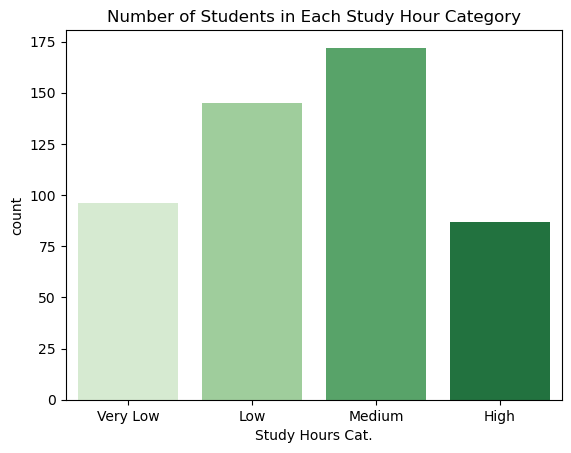

In [76]:
sns.countplot(x = 'Study Hours Cat.', hue = 'Study Hours Cat.', data=exam_data, palette = 'Greens', legend = False)
plt.title('Number of Students in Each Study Hour Category')
plt.show()

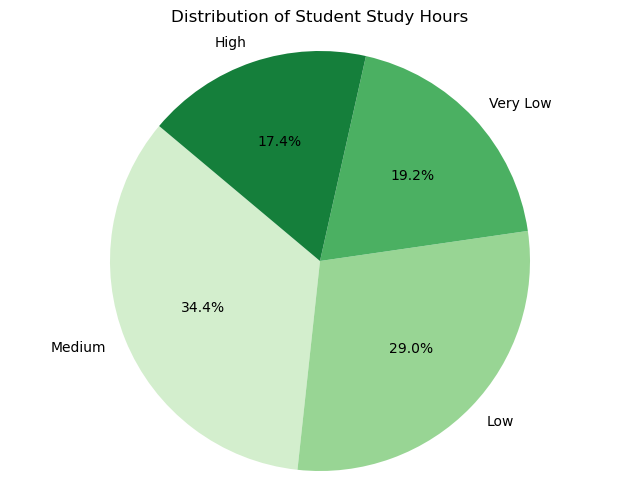

In [77]:
plt.figure(figsize=(8,6))
counts = exam_data['Study Hours Cat.'].value_counts()
colors = sns.color_palette('Greens', n_colors=len(counts))

plt.pie(counts, labels = counts.index, autopct = '%1.1f%%', startangle = 140, colors=colors)
plt.axis('equal')
plt.title('Distribution of Student Study Hours')
plt.show()

Below contains a full scatterplot of all the grades a student got on their previous exam (x-axis), the amount of hours they spent studying (y-axis), and if they passed (green) or failed (red).   
- **I would like you to see two things:**
    1. There are students who studied the full 10 hours and stilled failed the exam
    2. There are students who studied half of the full ten hours and passed them exam

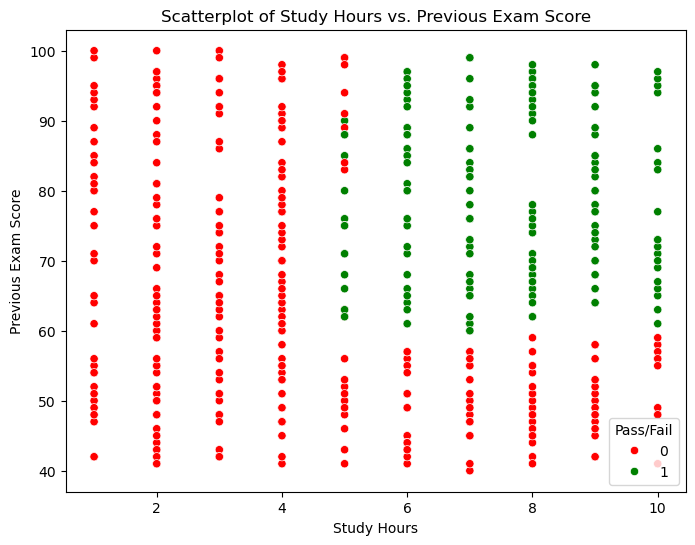

In [81]:
plt.figure(figsize = (8,6)) #Sets the figure size
palette = {0: 'red', 1: 'green'} #Sets the colors I want to represent the pass and fail

sns.scatterplot(x = 'Study Hours', y = 'Previous Exam Score', hue = 'Pass/Fail', data = exam_data, palette=palette) #create the actual scatterplot

#Labeling the axes, title, and pass or fail legend
plt.xlabel('Study Hours')
plt.ylabel('Previous Exam Score')
plt.title('Scatterplot of Study Hours vs. Previous Exam Score')
plt.legend(title = 'Pass/Fail')

plt.show() #Showing the graph

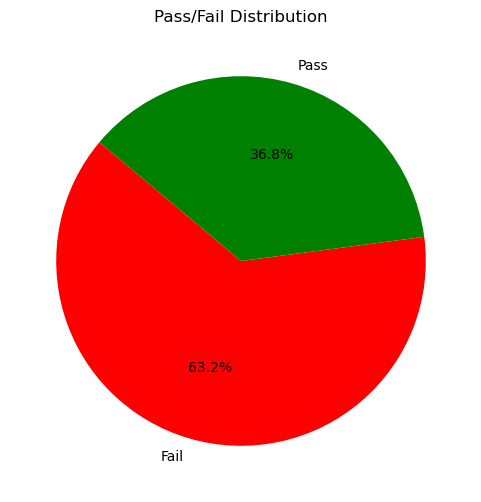

In [82]:
PF_counts = exam_data['Pass/Fail'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(PF_counts, labels =['Fail', 'Pass'], autopct = '%1.1f%%', startangle = 140, colors = ['red', 'green'])
plt.title('Pass/Fail Distribution')
plt.show()

The chart below shows the average study hour for each letter grade, which is pretty consistent around five and a half hours. **Please remember this.**

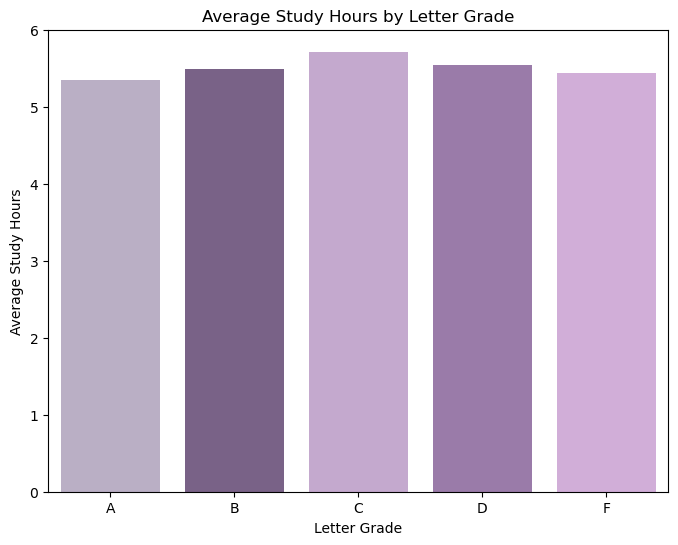

In [86]:
plt.figure(figsize = (8,6))

purple = ['#baabc9', '#7a5c8d', '#c7a3d4', '#9d74b0', '#d6a7df']
sns.barplot(x = 'Letter Grade', hue = 'Letter Grade', y = 'Study Hours', data = avg_SH, palette=purple, legend = False)

plt.xlabel('Letter Grade')
plt.ylabel('Average Study Hours')
plt.title('Average Study Hours by Letter Grade')

plt.show()

<hr>

## Modeling & Evaluation

For modeling, I've decided to use a decision tree with the root node being study hours. By using Study Hours, I'm able to classify out the target variable, which is whether or not this student passed the exam. 

This shows that if a student studies less than 4.5 hours they automatically failed the exam. This is cohesive with the scatterplot up above that shows how no one passed before the 5 hour mark. Following that, the model shows that if you studied around 5 and half hours you had the potential to pass or fail the exam. Finally, if you studied around 7 and half hours you were most likely to pass the exam. 

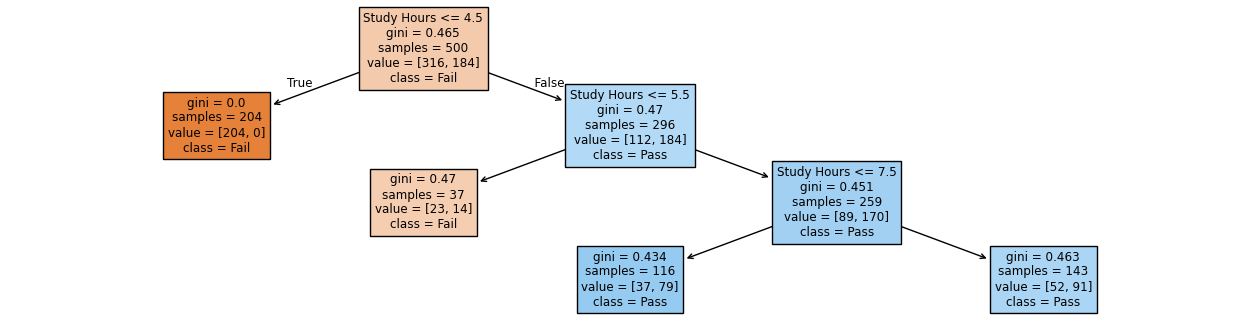

In [112]:
#For modeling use decision tree 
#for Evaluation use classficaiton chart

X = exam_data[['Study Hours']]
y = exam_data['Pass/Fail']

clf = DecisionTreeClassifier(max_depth=3, random_state = 42)
clf.fit(X, y)

plt.figure(figsize = (16,4))
tree.plot_tree(clf, feature_names=['Study Hours'], class_names = ['Fail', 'Pass'], filled = True)
plt.show()

To evaluate my model, I have used a confusion matrix to show how many correct/incorrect predictions were made. 

Please look underneath the code, to find the explanation of the code's result.

In [124]:
#Split the dataset into training and test sets to evaluate the model 
# X_train = Study Hours - training feature
# X_test = Study Hours - test features
# y_train = training lables - Pass/Fail
# y_test = test lables - Pass/Fail
# test_size = 20% of data is used for testing and 80% is used from training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#Trains the decision tree model
clf.fit(X_train, y_train)
#Uses the trained decision tree model to make predictions to on the test data (X_test)
y_pred = clf.predict(X_test)
#Compares the acutal labels (y_test) to the predicted labels (y_pred)
#Outputs a 2x2 Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

#Generates a performance report
report = classification_report(y_test, y_pred, target_names=['Fail', 'Pass'])
print("\nClassficiation Report:\n", report)

Confusion Matrix:
 [[47 17]
 [ 6 30]]

Classficiation Report:
               precision    recall  f1-score   support

        Fail       0.89      0.73      0.80        64
        Pass       0.64      0.83      0.72        36

    accuracy                           0.77       100
   macro avg       0.76      0.78      0.76       100
weighted avg       0.80      0.77      0.77       100



Confusion Matrix:

The confusion matrix is made up a 2x2 matrix that shows four things: True Negatives (TN), True Positives(TP), False Positive(FP), and False Negative(FN). In this case, TN are the students that were predicted to fail and did fail, TP are the students who were predicted to pass who acutally passed, FP are the students who were predicted to pass but actually failed, and FN are the students who were predicted to fail but actaully passed.  

Looking at the confusion matrix above you can see:
- 47 student were correctly predicted to fail
- 17 students were incorrectly predicted to pass but actually failed
- 6 students were incorrectly predicated to fail but actually passed
- 30 students were correctly predicted to pass


Classification Report:  

-Precision: Out of all the examples the model predicted as a certain class, how many were actually of that class. The model predicted that 47 students would pass and only 30 students were correctly predicted to pass the exam, giving a precision of 0.64 or 64%. The model predicted that 53 students would fail the exam and correctly estimated 47 students that failed, which gave a precision of 0.89 or 89%.  

-Recall: Out of all the actual examples in the class, recall shows how many the model correctly identified. As you can see the model correctly identified 80% of the students to Fail and 83% of the students to Pass. 

-F1-Score: Shows if there is a harmonic balance between precision and recall. With the Fail f1-score at 0.80 we have a strong model for predicting failing students, and with the Pass f1-score being 0.72, we have an acceptable predication of students that will pass but we could benefit from some improvement to our model.  

-Support: The number of actual occurances of each class in the dataset. This shows that we have a higher balance in the fail class than in the passing class. 

<hr>

## Storytelling & Impact

Now we're on the best part of the project, where I get to explain all the information I've just thrown at you! The main goal of this project was to see if I could predict if a student would pass or fail an exam based on the amount of time they studied and their previous exam score. 

Recapping what I've done in this project:
1. I've cleaned up the original dataset, making it easier to read.
2. I provided detailed visuals that showed the spread of our students in each study hour and Pass/Fail category.
3. I showed the model for data and the evaluated that our model was strong and could correctly predict if a student would pass or fail an exam.

In conclusion, I believe that I can correctly predict if a student will pass or fail an upcoming exam based on the amount of time that a student studies and their previous exam score. We can see that if a student studies around 5 hours or more and had a C average previous exam score they are very promsing for the next exam. Now, I told you previously in the project to please remember that each letter grade was the result of the average five hour study mark. This shows how every student in the class can say that they studied around five hours but we aren't able to take into account **how** they studied. We don't know if an A student took really good notes and studied the exam review or if an F student didn't take very good notes but also studied the same exam packet. What really helps are data, is the previous exam score. The previous exam shows us that even if a student studied for 10 hours for an exam but they failed their previous exam, that they don't have successful study methods and may not study effectively for the upcoming exam.

Following the conclusion, I believe that this project could have a very large effect on students and how they look at how they spend their study time. This shows that you need to be diligent in the methods and the materials you use for an exam. A student should clarify what specific chapters or other material a professor wants them to study so they don't waste there time studying for things they won't be tested on!

<hr>

## References

-  https://www.kaggle.com/datasets/mrsimple07/student-exam-performance-prediction
-  My Brain :)